# MFT Analysis
* Process MFT file with MFTECmd to CSV.
* Load CSV into a DataFrame.
* Days with more events in MFT.
* Files with more events in MFT.
* Executable files created before to de ransom note.


In [3]:
import os
from subprocess import check_output
mft_path = "\"C:\\kape\\collected\\2021-06-01T151604\\C\\$MFT\""
mftexplorer_path = "\"C:\\MFTExplorer\\MFTECmd.exe\""
output_folder = "C:\\Documents\\test"
output_filename = "MyOutputFile.csv"


In [ ]:
%%time
command = "{0} -f {1} --csv \"{2}\" --csvf \"{3}\"".format(mftexplorer_path, mft_path, output_folder, output_filename)
print(command)
output = os.popen(command).read()

## DataFrame creation with MFT

In [4]:
%%time
import pandas as pd 
pd.set_option('display.max_columns', 500)

data = pd.read_csv(output_folder + "\\" + output_filename)

<decorator-gen-55>:2: DtypeWarning: Columns (10,20,22,26,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 5.1 s


In [5]:
len(data)

501082

In [8]:
data.head(1)

,EntryNumber,SequenceNumber,InUse,ParentEntryNumber,ParentSequenceNumber,ParentPath,FileName,Extension,FileSize,ReferenceCount,ReparseTarget,IsDirectory,HasAds,IsAds,SI<FN,uSecZeros,Copied,SiFlags,NameType,Created0x10,Created0x30,LastModified0x10,LastModified0x30,LastRecordChange0x10,LastRecordChange0x30,LastAccess0x10,LastAccess0x30,UpdateSequenceNumber,LogfileSequenceNumber,SecurityId,ObjectIdFileDroid,LoggedUtilStream,ZoneIdContents
0,0,1,True,5,5,.,$MFT,NaN,482082816,1,NaN,False,False,False,False,False,False,Hidden|System,DosWindows,2018-05-09 18:18:22.2782672,NaN,2018-05-09 18:18:22.2782672,NaN,2018-05-09 18:18:22.2782672,NaN,2018-05-09 18:18:22.2782672,NaN,0,167459167393,256,NaN,NaN,NaN


In [6]:
data.set_index("EntryNumber", inplace=True)

In [7]:
%%time
data['Created0x10'] =  pd.to_datetime(data['Created0x10'], format='%Y-%m-%d %H:%M:%S.%f')
data['Created0x30'] =  pd.to_datetime(data['Created0x30'], format='%Y-%m-%d %H:%M:%S.%f')
data['LastModified0x10'] =  pd.to_datetime(data['LastModified0x10'], format='%Y-%m-%d %H:%M:%S.%f')
data['LastModified0x30'] =  pd.to_datetime(data['LastModified0x30'], format='%Y-%m-%d %H:%M:%S.%f')
data['LastRecordChange0x10'] =  pd.to_datetime(data['LastRecordChange0x10'], format='%Y-%m-%d %H:%M:%S.%f')
data['LastRecordChange0x30'] =  pd.to_datetime(data['LastRecordChange0x30'], format='%Y-%m-%d %H:%M:%S.%f')

Wall time: 2.54 s


### Days with more events in MFT

In [8]:
dates = data["LastRecordChange0x10"]

In [9]:
dates.index = dates.dt.to_period('d')

In [10]:
s = dates.groupby(level=0).size()

In [11]:
s.sort_values(ascending=False).head(10)

LastRecordChange0x10
2018-05-09    91072
2021-05-13    78420
2021-03-11    40069
2021-02-22    26698
2018-06-21    24047
2021-05-17    23735
2021-02-11    21200
2019-08-13    15962
2021-01-25    15456
2021-03-29    14427
Freq: D, Name: LastRecordChange0x10, dtype: int64

### Graph by dates

<AxesSubplot:xlabel='LastRecordChange0x10'>

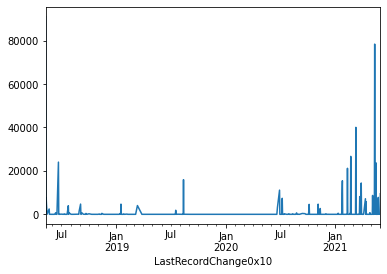

In [12]:
import matplotlib.pyplot as plt
s.plot()

In [15]:
s1 = s.loc['2021-05-18 23:00:00':'2021-05-29 00:00:00']

<AxesSubplot:xlabel='LastRecordChange0x10'>

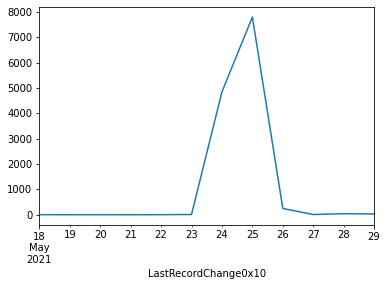

In [16]:
s1.plot()

### Most repeated names

In [17]:
data_filtered = data[(data['LastModified0x10'] > "2021-01-01") & (data['LastModified0x10'] < "2021-05-30")]
names = data_filtered["FileName"].value_counts()

In [20]:
names.nlargest()

3lvnvt-readme.txt    1183
ui-strings.js        1017
messages.json         488
Report.wer            384
mpuxagent.dll.mui     252
Name: FileName, dtype: int64

### Filenames that contains "readme"

In [ ]:
readme = data[(data["FileName"].str.contains("readme")) & (data['LastModified0x10'] > "2021-05-21") & (data['LastModified0x10'] < "2021-05-27")]
readme.sort_values(by='LastModified0x10', ascending=True)

### Most used extension files

In [24]:
data[(data['LastModified0x10'] > "2021-05-21") & (data['LastModified0x10'] < "2021-05-27")].groupby("Extension").size().nlargest()

Extension
.3lvnvt    2357
.txt       1203
.log        475
.json       470
.evtx       278
dtype: int64

### Executables created after first ransom note was created

In [25]:
first_note = readme1.sort_values(by="LastModified0x10", ascending=True).iloc[0]["LastModified0x10"]
range_exe = first_note + pd.offsets.Hour(-12)

In [26]:
data_filtered = data[(data['Created0x10'] > "2021-05-22") & (data['Created0x10'] < "2021-05-25")]
files = data_filtered[data_filtered["FileName"].str.contains("\.exe|\.ps1|\.msi|\.vba", regex=True)]

In [27]:
files.head()

,SequenceNumber,InUse,ParentEntryNumber,ParentSequenceNumber,ParentPath,FileName,Extension,FileSize,ReferenceCount,ReparseTarget,IsDirectory,HasAds,IsAds,SI<FN,uSecZeros,Copied,SiFlags,NameType,Created0x10,Created0x30,LastModified0x10,LastModified0x30,LastRecordChange0x10,LastRecordChange0x30,LastAccess0x10,LastAccess0x30,UpdateSequenceNumber,LogfileSequenceNumber,SecurityId,ObjectIdFileDroid,LoggedUtilStream,ZoneIdContents
EntryNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110904,273,True,33365,146,.\Temp,mm903fv092v33fj.ps1.3lvnvt,.3lvnvt,348539,1,NaN,False,False,False,False,False,False,Archive,Windows,2021-05-24 07:01:46.935530500,NaT,2021-05-24 07:04:24.860815800,NaT,2021-05-25 08:12:02.792699800,2021-05-24 07:04:24.896892400,2021-05-24 07:01:46.9355305,NaN,32523174816,183059500486,522,NaN,NaN,NaN
116957,537,True,33365,146,.\Temp,mm903fv092v33fj.exe,.exe,124928,1,NaN,False,False,False,False,False,False,Archive,Windows,2021-05-24 07:09:45.756927300,NaT,2021-05-24 07:09:45.757932700,NaT,2021-05-25 08:12:02.777115200,2021-05-24 07:09:45.757932700,2021-05-24 07:09:45.7569273,NaN,32523174488,183059499899,522,NaN,NaN,NaN
117171,44,True,33365,146,.\Temp,sender.exe,.exe,36352,1,NaN,False,False,False,False,False,False,Archive,DosWindows,2021-05-24 07:25:18.807582400,NaT,2021-05-24 07:25:18.808585400,NaT,2021-05-25 08:12:02.792699800,2021-05-24 07:25:18.808585400,2021-05-24 07:25:18.8075824,NaN,32523175784,183059502709,522,NaN,NaN,NaN
117178,57,True,106507,1,.\Users\user\AppData\Local\Microsoft_Corpo...,PowerShell_ISE.exe_StrongName_lw2v2vm3wmtzzpeb...,NaN,0,1,NaN,True,False,False,False,False,False,None,Windows,2021-05-24 07:37:25.344780300,NaT,2021-05-24 07:37:25.345783800,2021-05-24 07:37:25.344780300,2021-05-25 08:12:25.573868400,2021-05-24 07:37:25.344780300,2021-05-24 07:37:25.3457838,2021-05-24 07:37:25.3447803,32524116232,183060749720,2072,NaN,NaN,NaN
